In [103]:
from tokenize import PlainToken
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
from PIL import Image

In [12]:
## get the train and predicted
results = pd.read_csv('/Users/cmbreen/Documents/Chapter 1/CV4EcologyData/results/exp_resnet50_2classes_None/figs/resultsTEST.csv')
## get the time-series information from metadata
labels = pd.read_csv('/Volumes/CatBreen/testLabels.csv')
meta = results.merge(labels, left_on="filenames", right_on="File")
results.head()
#labels.head()
meta = meta[['filenames','trueLabels', 'predictedLabels','confidences','Weather','Date','Time','Temperature','location']]

In [14]:
meta['Date'] = pd.to_datetime(meta['Date'])

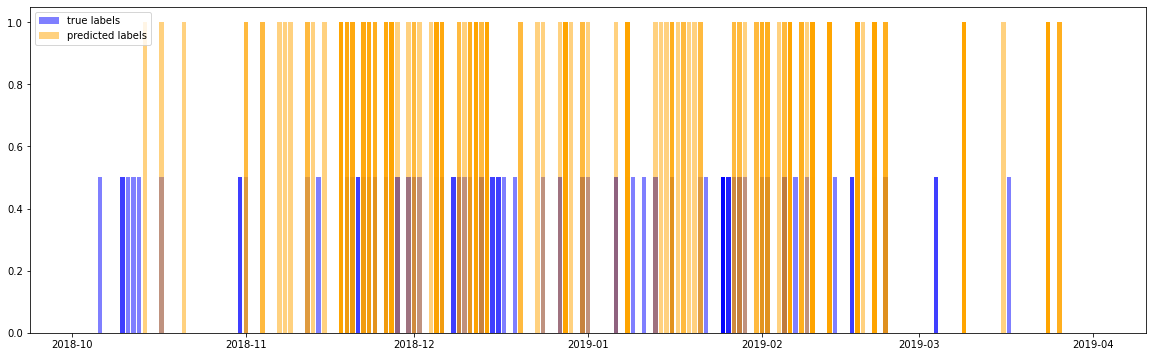

In [38]:
plot = plt.figure(figsize=(20,6))
plt.bar(meta['Date'], meta['trueLabels']*0.5, color = "blue", label='true labels', alpha =0.5)
plt.bar(meta['Date'], meta['predictedLabels'], color ="orange" , label= 'predicted labels', alpha=0.5)
plt.legend()

In [66]:
snowSegmentation= pd.read_csv('/Volumes/CatBreen/whitePixelIndexAI_test_resized_unet.csv')
snowSegmentation.head()
snowIndex = snowSegmentation.merge(labels, left_on="filename", right_on="File")
snowIndex['Date'] = pd.to_datetime(snowIndex['Date'])
subset = snowIndex[snowIndex['location'] == 1120]
subset = subset.sort_values(by=['Date'], ascending=True).reset_index()  
subset

index                 filename  whitePixelIndexAI_test_resized  \
0     1335    1120_20190723 (5).JPG                        0.821759   
1     2882    1120_20190723 (7).JPG                        0.366319   
2      382   1120_20190723 (10).JPG                        0.118779   
3     1678   1120_20190723 (11).JPG                        0.957321   
4     1215   1120_20190723 (27).JPG                        0.590567   
..     ...                      ...                             ...   
439   1134  1120_20190723 (761).JPG                        0.008681   
440   1587  1120_20190723 (762).JPG                        0.032263   
441    253  1120_20190723 (763).JPG                        0.032552   
442   1119  1120_20190723 (764).JPG                        0.013455   
443   2091  1120_20190723 (765).JPG                        0.003038   

     Unnamed: 0                     File Weather       Date      Time  \
0          2651    1120_20190723 (5).JPG     Fog 2018-11-14   8:00:00   
1          4712    1120_20190723 (7).JPG    None 2018-11-16   8:00:00   
2          3673   1120_20190723 (10).JPG    None 2018-11-16  17:06:07   
3         18395   1120_20190723 (11).JPG   Other 2018-11-17   8:00:00   
4          2645   1120_20190723 (27).JPG     Fog 2018-11-18   8:00:00   
..          ...                      ...     ...        ...       ...   
439        4752  1120_20190723 (761).JPG    None 2019-03-28   8:00:00   
440        4753  1120_20190723 (762).JPG    None 2019-03-29   8:00:00   
441        4754  1120_20190723 (763).JPG    None 2019-03-30   8:00:00   
442        4755  1120_20190723 (764).JPG    None 2019-03-31   8:00:00   
443        4756  1120_20190723 (765).JPG    None 2019-04-01   8:00:00   

     SnowCover  Temperature  location  
0          0.0          1.0      1120  
1          0.0          7.0      1120  
2          NaN          7.0      1120  
3          0.0          4.0      1120  
4          0.0         -2.0      1120  
..         ...          ...       ...  
439        1.0          0.0      1120  
440        1.0          6.0      1120  
441        1.0          5.0      1120  
442        1.0          0.0      1120  
443        1.0         -3.0      1120  

[444 rows x 11 columns]

In [116]:
subset1120 = meta[meta['location'] == 1120]

In [177]:
sentinel= pd.read_csv('/Users/cmbreen/Documents/Chapter 1/sentinelPoint_snow_2015-2022.csv')
sentinel.head()
sentinel['time'] = [time.split('T')[0] for time in sentinel['imageId']]
sentinel['time'] = pd.to_datetime(sentinel['time'])
sentinel = sentinel[sentinel['mean']>=0].reset_index()
sentinel = sentinel[(sentinel['time']>= '2018-10-01') & (sentinel['time'] <= '2019-04-01')]
sentinelsubset = sentinel[sentinel['LokalitetID']==1120]
sentinelsubset

index              system:index  LokalitetID              imageId  \
20206  91367  327_000000000000000001a5         1120  2018-11-26T00:00:00   
20643  91982  328_000000000000000001a5         1120  2018-11-27T00:00:00   
22063  93907  341_000000000000000001a5         1120  2019-01-18T00:00:00   
22891  94779  343_000000000000000001a5         1120  2019-01-20T00:00:00   
25692  98487  369_000000000000000001a5         1120  2019-03-11T00:00:00   
26732  99769  373_000000000000000001a5         1120  2019-03-19T00:00:00   

           mean                                               .geo       time  
20206  0.089716  {"type":"Point","coordinates":[10.967671837571... 2018-11-26  
20643  0.242925  {"type":"Point","coordinates":[10.967671837571... 2018-11-27  
22063  0.780767  {"type":"Point","coordinates":[10.967671837571... 2019-01-18  
22891  0.631368  {"type":"Point","coordinates":[10.967671837571... 2019-01-20  
25692  0.511515  {"type":"Point","coordinates":[10.967671837571... 2019-03-11  
26732  0.399314  {"type":"Point","coordinates":[10.967671837571... 2019-03-19

In [229]:
## animals
animals = pd.read_csv("~/Documents/Chapter 3/images_20220217.csv")
animals.head()
animals['captured_at_exif'] = animals['captured_at_exif'].astype(str)
#animals['imageId']
animals['time'] = [time.split(' ')[0] for time in animals['captured_at_exif']]
animals['time'] = [time.replace(':',"-") for time in animals['time']]
animals['time'] = pd.to_datetime(animals['time'])
animals1120 = animals[animals['location_id'] == '1120']
animals1120 = animals1120[(animals1120['time'] > '2018-10-01') & (animals1120['time'] < '2019-04-01')]
animals1120 = animals1120[animals1120['validated_species'] != 'menneske']
animals1120 = animals1120[animals1120['validated_species'] != 'kjoeretoey']
animals1120 = animals1120[animals1120['validated_species'] != 'nothing'].reset_index()

/var/folders/zb/5h7hn0zj17q_sc1ks33298p40000gp/T/ipykernel_86292/1512655394.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  animals = pd.read_csv("~/Documents/Chapter 3/images_20220217.csv")


In [238]:
len(animals1120)
print(animals1120)

     index  Unnamed: 0  image_id location_id  timeserie_id  \
0   268287      268288   2865445        1120        440901   
1   268317      268318   2865663        1120        441030   
2   268335      268336   2865820        1120        440914   
3   268339      268340   2865881        1120        440900   
4   268345      268346   2865909        1120        441030   
5   268397      268398   2866278        1120        440985   
6   268404      268405   2866332        1120        440930   
7   268418      268419   2866435        1120        441030   
8   268422      268423   2866460        1120        440949   
9   268436      268437   2866543        1120        440899   
10  268459      268460   2866752        1120        441030   
11  268480      268481   2866873        1120        440663   

       captured_at_exif  num_animals validated_species       time  
0   2018:11:16 17:06:05          1.0              hare 2018-11-16  
1   2019:01:08 05:38:55          2.0               ulv 20

In [237]:
len(wolf_presence)

20

In [243]:
wolf_presence = []
for item in animals1120['validated_species']:
    if item == 'ulv': wolf_presence.append(1)
    else: wolf_presence.append(np.nan)

hare_presence = []
for item in animals1120['validated_species']:
    if item == 'hare': hare_presence.append(1)
    else: hare_presence.append(np.nan)

animals1120['wolf_presence'] = wolf_presence
animals1120['hare_presence'] = hare_presence


In [244]:
animals1120['validated_species'].unique()

array(['hare', 'ulv'], dtype=object)

In [260]:
!pip install scipy

  Using cached scipy-1.9.0-cp38-cp38-macosx_12_0_universal2.macosx_10_9_x86_64.whl (58.1 MB)


In [277]:
test = pd.DataFrame(subset['Date'], subset['whitePixelIndexAI_test_resized'])#.drop_duplicates(subset = 'Date')
print(test.head())
from scipy.interpolate import make_interp_spline
X_Y_Spline = make_interp_spline(test['Date'], test['whitePixelIndexAI_test_resized'])
X_ = np.linspace(test['Date'].min(), test['Date'].max(), 500)
Y_ = X_Y_Spline(X_)

                               Date
whitePixelIndexAI_test_resized     
0.821759                        NaT
0.366319                        NaT
0.118779                        NaT
0.957321                        NaT
0.590567                        NaT


KeyError: 'whitePixelIndexAI_test_resized'

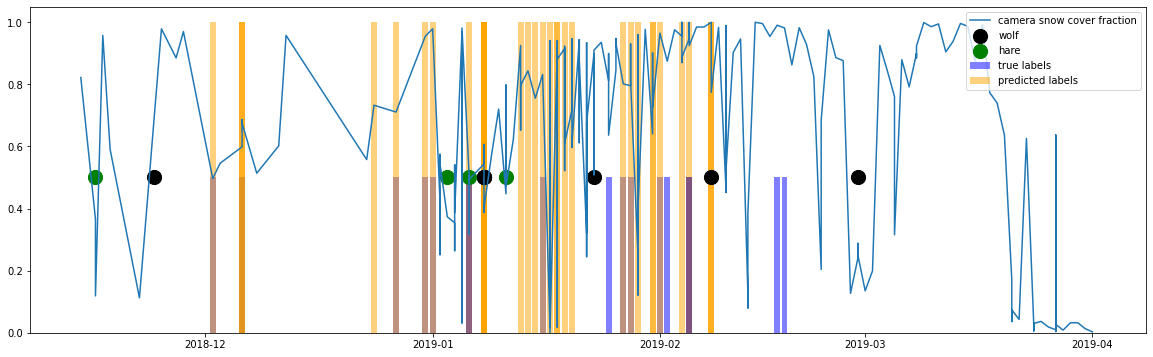

In [278]:
plot = plt.figure(figsize=(20,6))
plt.bar(subset1120['Date'], subset1120['trueLabels']*0.5, color = "blue", label='true labels', alpha =0.5)
plt.bar(subset1120['Date'], subset1120['predictedLabels'], color ="orange" , label= 'predicted labels', alpha=0.5)
plt.plot(subset['Date'], subset['whitePixelIndexAI_test_resized'], label ="camera snow cover fraction")
#plt.plot(sentinelsubset['time'], sentinelsubset['mean'], label = 'sentinel')
plt.scatter(animals1120['time'], animals1120['wolf_presence']*0.5, label = 'wolf', color = 'black', s =200)
plt.scatter(animals1120['time'], animals1120['hare_presence']*0.5, label = 'hare', color = 'green', s = 200)
plt.legend()

In [96]:
snoq = glob.glob('/Volumes/CatBreen/CV4ecology/snoq/**/*')
olympex = glob.glob('/Volumes/CatBreen/CV4ecology/olympex/**/*')
scandcam = glob.glob('/Volumes/CatBreen/CV4ecology/scandcam/**/*')

all_paths = snoq+olympex+scandcam
all_files = [file.split('/')[-1] for file in all_paths]
paths = pd.DataFrame({'all_paths':all_paths,'all_files':all_files})
#paths.head()

all_paths                all_files
0  /Volumes/CatBreen/CV4ecology/snoq/Rain/2014_12...  2014_12_02_12_00_00.jpg
1  /Volumes/CatBreen/CV4ecology/snoq/Rain/2014_10...  2014_10_18_13_01_00.jpg
2  /Volumes/CatBreen/CV4ecology/snoq/Rain/2014_10...  2014_10_22_12_00_00.jpg
3  /Volumes/CatBreen/CV4ecology/snoq/Rain/2014_11...  2014_11_27_13_01_00.jpg
4  /Volumes/CatBreen/CV4ecology/snoq/Rain/2014_12...  2014_12_11_08_00_00.jpg

In [117]:
subset1120_january = subset1120[(subset1120['Date'] >= '2019-01-12') & (subset1120['Date'] <= '2019-01-20')].sort_values(by=['Date'], ascending=True)
subset1120weather = subset1120_january[subset1120_january['predictedLabels']==1]
subset1120weather


filenames  trueLabels  predictedLabels  confidences  \
1185  1120_20190723 (368).JPG           0                1     0.650665   
487   1120_20190723 (375).JPG           0                1     0.901713   
1193  1120_20190723 (376).JPG           0                1     0.970857   
190   1120_20190723 (377).JPG           1                1     0.998698   
641   1120_20190723 (378).JPG           0                1     0.842773   
1247  1120_20190723 (409).JPG           0                1     0.561330   
1241  1120_20190723 (406).JPG           0                1     0.993977   
1271  1120_20190723 (425).JPG           0                1     0.693277   
540   1120_20190723 (438).JPG           0                1     0.991178   

     Weather       Date      Time  Temperature  location  
1185    None 2019-01-13   8:00:00         -5.0      1120  
487     None 2019-01-14   8:00:00        -10.0      1120  
1193    None 2019-01-15   8:00:00         -9.0      1120  
190     Snow 2019-01-16   8:00:00         -6.0      1120  
641     None 2019-01-17   8:00:00        -13.0      1120  
1247    None 2019-01-18  10:12:43        -15.0      1120  
1241    None 2019-01-18   8:00:00        -18.0      1120  
1271    None 2019-01-19   8:00:00        -11.0      1120  
540     None 2019-01-20   8:00:00        -13.0      1120

In [118]:
subset1120_wpaths = subset1120weather.merge(paths, left_on='filenames', right_on='all_files')
subset1120_wpaths

filenames  trueLabels  predictedLabels  confidences Weather  \
0  1120_20190723 (368).JPG           0                1     0.650665    None   
1  1120_20190723 (375).JPG           0                1     0.901713    None   
2  1120_20190723 (376).JPG           0                1     0.970857    None   
3  1120_20190723 (377).JPG           1                1     0.998698    Snow   
4  1120_20190723 (378).JPG           0                1     0.842773    None   
5  1120_20190723 (409).JPG           0                1     0.561330    None   
6  1120_20190723 (406).JPG           0                1     0.993977    None   
7  1120_20190723 (425).JPG           0                1     0.693277    None   
8  1120_20190723 (438).JPG           0                1     0.991178    None   

        Date      Time  Temperature  location  \
0 2019-01-13   8:00:00         -5.0      1120   
1 2019-01-14   8:00:00        -10.0      1120   
2 2019-01-15   8:00:00         -9.0      1120   
3 2019-01-16   8:00:00         -6.0      1120   
4 2019-01-17   8:00:00        -13.0      1120   
5 2019-01-18  10:12:43        -15.0      1120   
6 2019-01-18   8:00:00        -18.0      1120   
7 2019-01-19   8:00:00        -11.0      1120   
8 2019-01-20   8:00:00        -13.0      1120   

                                           all_paths                all_files  
0  /Volumes/CatBreen/CV4ecology/scandcam/None/112...  1120_20190723 (368).JPG  
1  /Volumes/CatBreen/CV4ecology/scandcam/None/112...  1120_20190723 (375).JPG  
2  /Volumes/CatBreen/CV4ecology/scandcam/None/112...  1120_20190723 (376).JPG  
3  /Volumes/CatBreen/CV4ecology/scandcam/Snow/112...  1120_20190723 (377).JPG  
4  /Volumes/CatBreen/CV4ecology/scandcam/None/112...  1120_20190723 (378).JPG  
5  /Volumes/CatBreen/CV4ecology/scandcam/None/112...  1120_20190723 (409).JPG  
6  /Volumes/CatBreen/CV4ecology/scandcam/None/112...  1120_20190723 (406).JPG  
7  /Volumes/CatBreen/CV4ecology/scandcam/None/112...  1120_20190723 (425).JPG  
8  /Volumes/CatBreen/CV4ecology/scandcam/None/112...  1120_20190723 (438).JPG

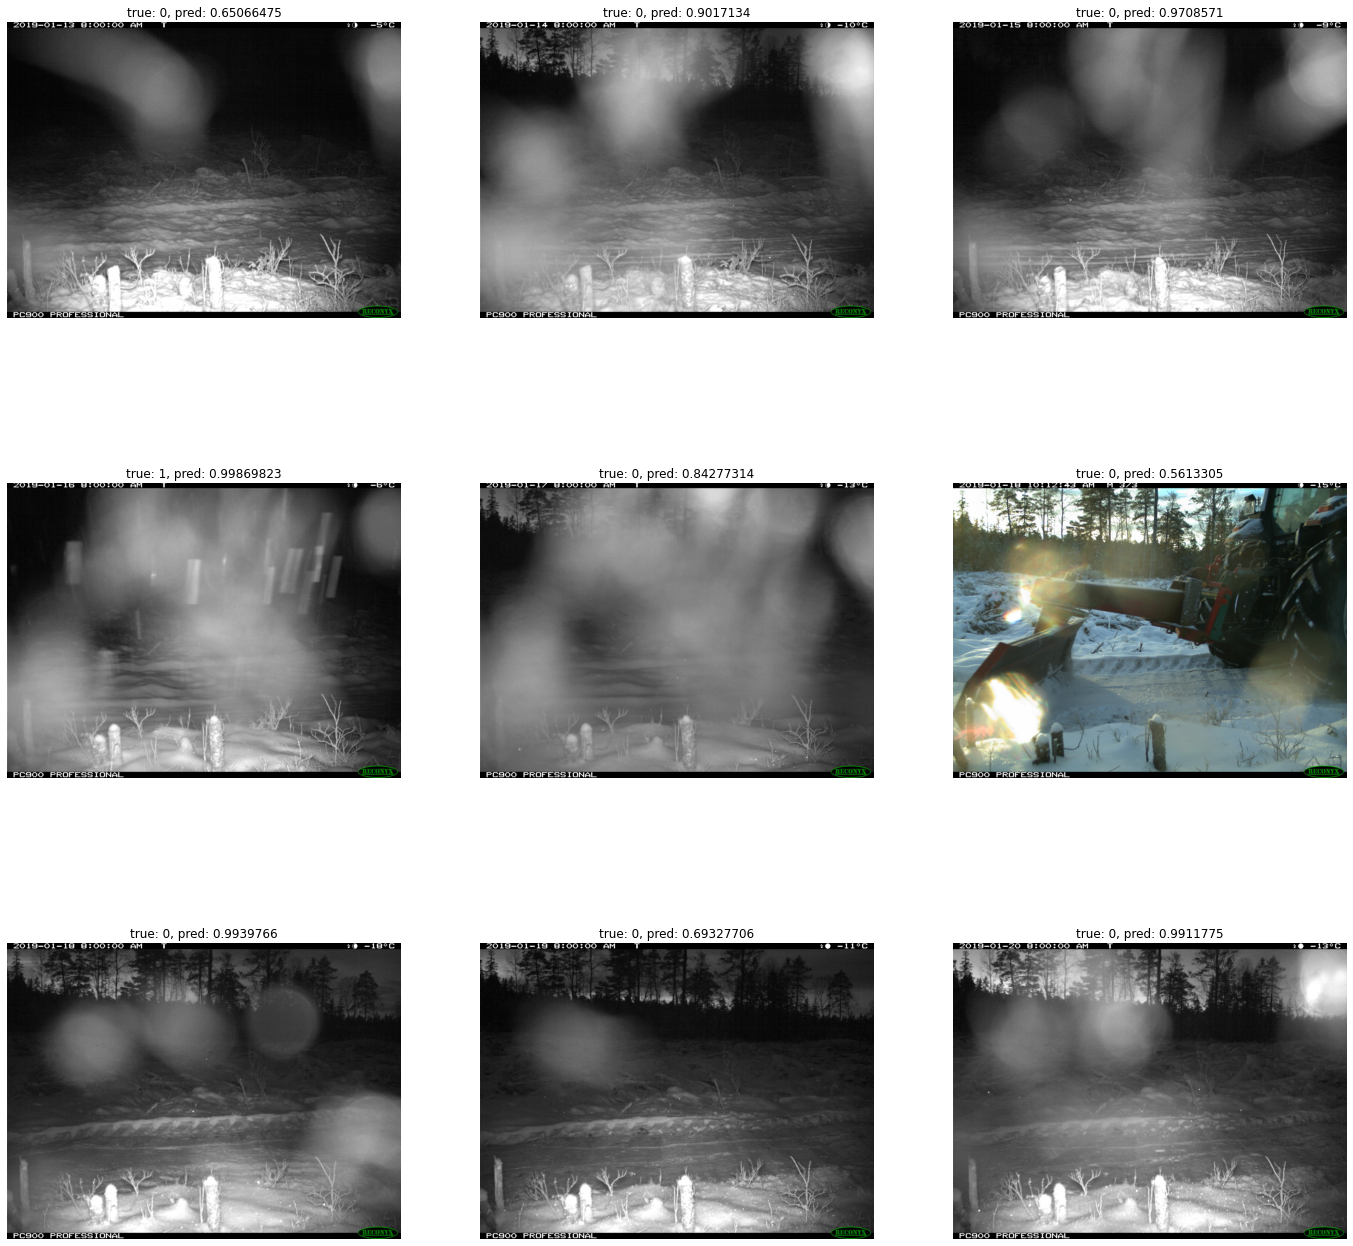

In [111]:
#mismatch['index'][0]
fig, axs = plt.subplots(3, 3, figsize=(24, 24))
rows = 3
cols = 3
idx = 0
for row in range(rows):
    for col in range(cols):
        im = Image.open(subset1120_wpaths['all_paths'][idx])
        axs[row, col].imshow(im)
        axs[row, col].axis('off')
        axs[row,col].title.set_text('true: ' + str(subset1120_wpaths['trueLabels'][idx]) + ', pred: ' + str(subset1120_wpaths['confidences'][idx]))
        idx += 1



                    filenames  trueLabels  predictedLabels  confidences  \
49    1120_20190723 (135).JPG           1                1     0.590090   
1169  1120_20190723 (136).JPG           0                0     0.036054   
176   1120_20190723 (176).JPG           1                1     0.871160   
210   1120_20190723 (177).JPG           1                1     0.996972   
211   1120_20190723 (178).JPG           1                1     0.968834   
1194  1120_20190723 (207).JPG           0                0     0.000045   

     Weather       Date      Time  Temperature  location  
49      Rain 2018-12-02   8:00:00          3.0      1120  
1169    None 2018-12-03   8:00:00          5.0      1120  
176     Snow 2018-12-06  23:09:24         -1.0      1120  
210     Snow 2018-12-06  23:09:25         -1.0      1120  
211     Snow 2018-12-06  23:09:26         -1.0      1120  
1194    None 2018-12-08   8:00:00         -1.0      1120  


KeyError: 6

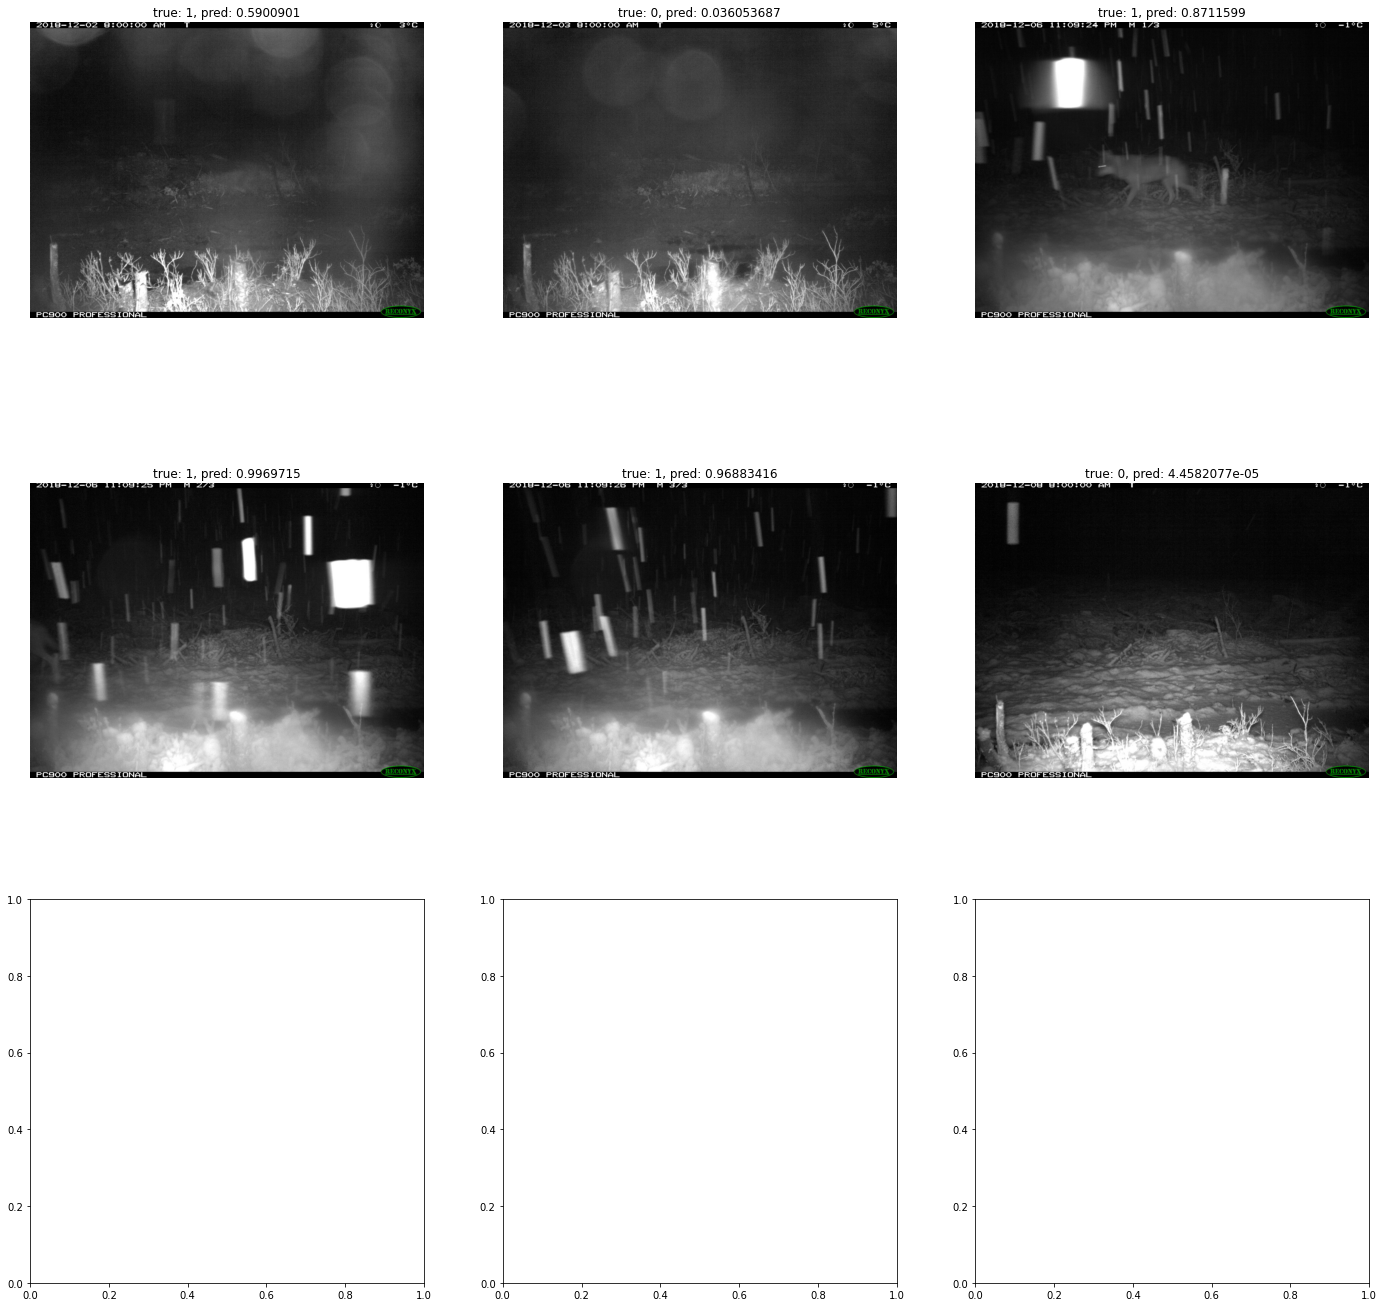

In [256]:
## 
subset1120_december = subset1120[(subset1120['Date'] >= '2018-12-01') & (subset1120['Date'] <= '2018-12-10')].sort_values(by=['Date'], ascending=True)
#subset1120weather = subset1120[subset1120['predictedLabels']==1]
#subset1120weather
print(subset1120_december)

subset1120_december_paths = subset1120_december.merge(paths, left_on='filenames', right_on='all_files')
#subset1120_december_paths = subset1120_december_paths.drop([4]).reset_index()
 ## drop row 5
subset1120_december_paths

#mismatch['index'][0]
fig, axs = plt.subplots(3, 3, figsize=(24, 24))
rows = 3
cols = 3
idx = 0
for row in range(rows):
    for col in range(cols):
        im = Image.open(subset1120_december_paths['all_paths'][idx])
        axs[row, col].imshow(im)
        axs[row, col].axis('off')
        axs[row,col].title.set_text('true: ' + str(subset1120_december_paths['trueLabels'][idx]) + ', pred: ' + str(subset1120_december_paths['confidences'][idx]))
        idx += 1


In [ ]:
subset1120_february = subset1120[(subset1120['Date'] >= '2019-02-13') & (subset1120['Date'] <= '2019-02-22')].sort_values(by=['Date'], ascending=True)
#subset1120weather = subset1120[subset1120['predictedLabels']==1]
#subset1120weather
subset1120_february = subset1120_february[-11:-1]

subset1120_february_paths = subset1120_february.merge(paths, left_on='filenames', right_on='all_files')
subset1120_february_paths = subset1120_february_paths.drop([4]).reset_index()
 ## drop row 5
subset1120_february_paths

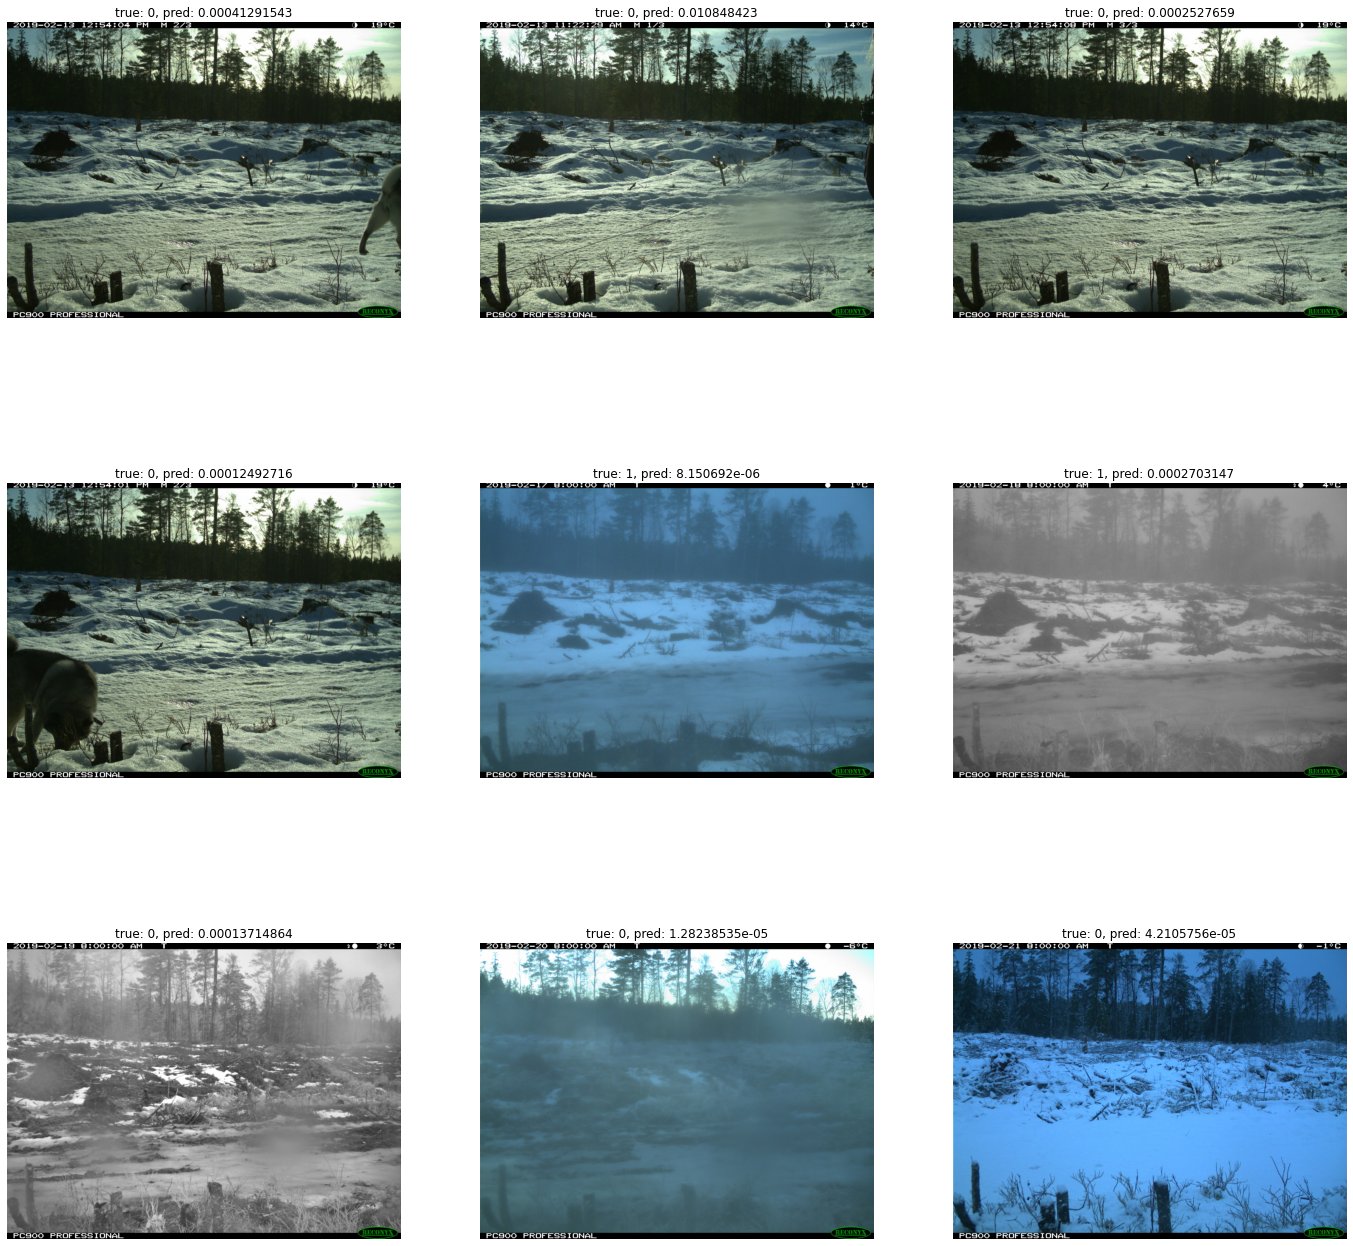

In [147]:
fig, axs = plt.subplots(3, 3, figsize=(24, 24))
rows = 3
cols = 3
idx = 0
for row in range(rows):
    for col in range(cols):
        im = Image.open(subset1120_february_paths['all_paths'][idx])
        axs[row, col].imshow(im)
        axs[row, col].axis('off')
        axs[row,col].title.set_text('true: ' + str(subset1120_february_paths['trueLabels'][idx]) + ', pred: ' + str(subset1120_february_paths['confidences'][idx]))
        idx += 1

In [154]:
results3 = pd.read_csv('/Users/cmbreen/Documents/Chapter 1/CV4EcologyData/results/exp_resnet50_3classes/figs/figs/resultsTEST.csv')## 68 files that are rain that are NOT rain
results3 = results3[['filenames', 'trueLabels','predictedLabels', 'confidences0', 'confidences1', 'confidences2']]
meta3 = results3.merge(labels, left_on="filenames", right_on="File")
results.head()
#labels.head()
meta3 = meta3[['filenames','trueLabels', 'predictedLabels','confidences0', 'confidences1','confidences2','Weather','Date','Time','Temperature','location']]
meta3
meta3['Date'] = pd.to_datetime(meta3['Date'])

In [155]:
subset1120_3 = meta3[meta3['location'] == 1120]


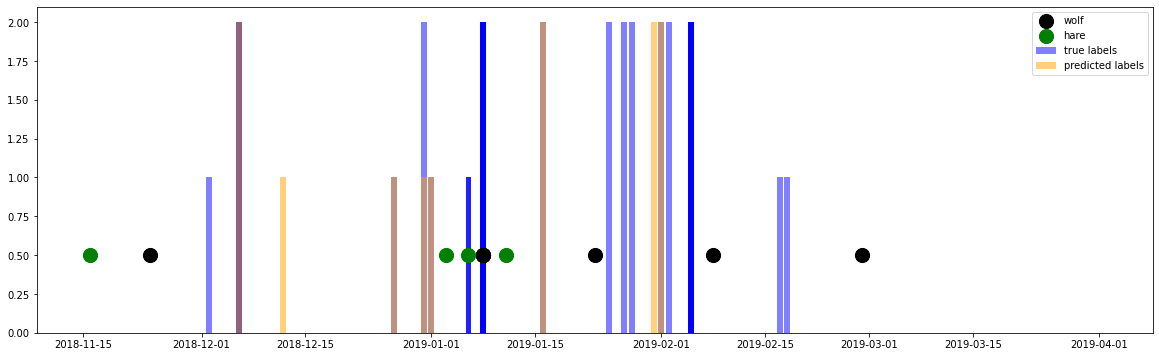

In [252]:
plot = plt.figure(figsize=(20,6))
plt.bar(subset1120_3['Date'], subset1120_3['trueLabels'], color = "blue", label='true labels', alpha =0.5)
plt.bar(subset1120_3['Date'], subset1120_3['predictedLabels'], color ="orange" , label= 'predicted labels', alpha=0.5)
plt.scatter(animals1120['time'], animals1120['wolf_presence']*0.5, label = 'wolf', color = 'black', s =200)
plt.scatter(animals1120['time'], animals1120['hare_presence']*0.5, label = 'hare', color = 'green', s = 200)
#plt.plot(subset['Date'], subset['whitePixelIndexAI_test_resized'])
plt.legend()